<a href="https://colab.research.google.com/github/querenneves/Aprendizado-profundo/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import keras.datasets as kds

import numpy as np
import matplotlib.pyplot as plt

# Bibliotecas utilizadas para projeção / redução de dimensionalidade
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA, PCA

## Carregamento dos dados (MNIST)

> Adicionar aspas



In [5]:
num_classes = 10
input_shape = (28, 28, 1)

# Carga dos dados (keras.datasets)
(x_train, y_train), (x_test, y_test) = kds.mnist.load_data()

# Normalização das features
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)


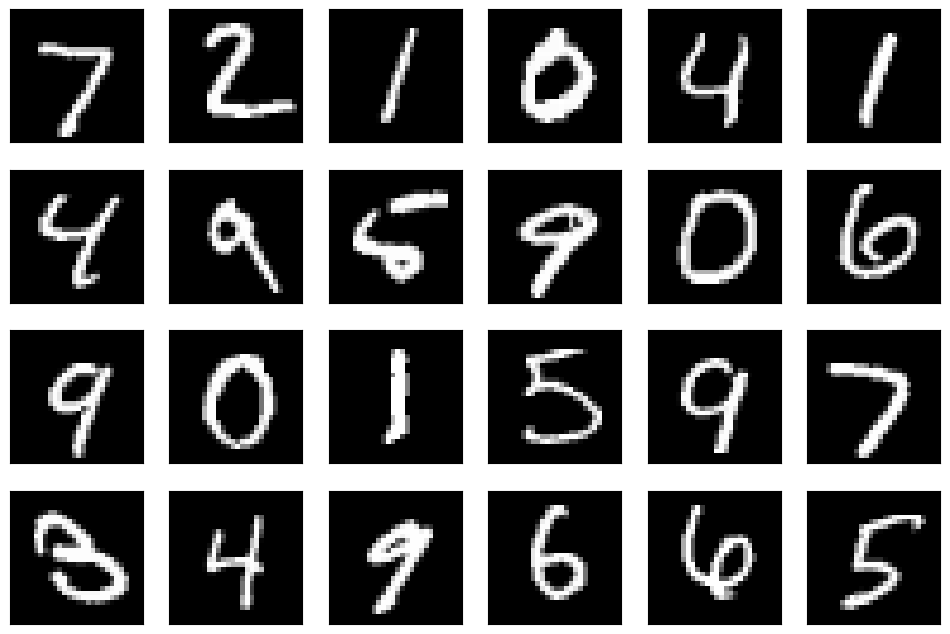

In [6]:
plt.figure(figsize=(12, 8))
for i in range(24):
    ax = plt.subplot(4, 6, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Autoencoder 01: Autoencoder Raso

## Definição do Modelo

In [7]:
encoding_dim = 12

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder01 = keras.Model(input_img, decoded)
autoencoder01.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │         9,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        10,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,612 (76.61 KB)

 Trainable params: 19,612 (76.61 KB)

 Non-trainable params: 0 (0.00 B)

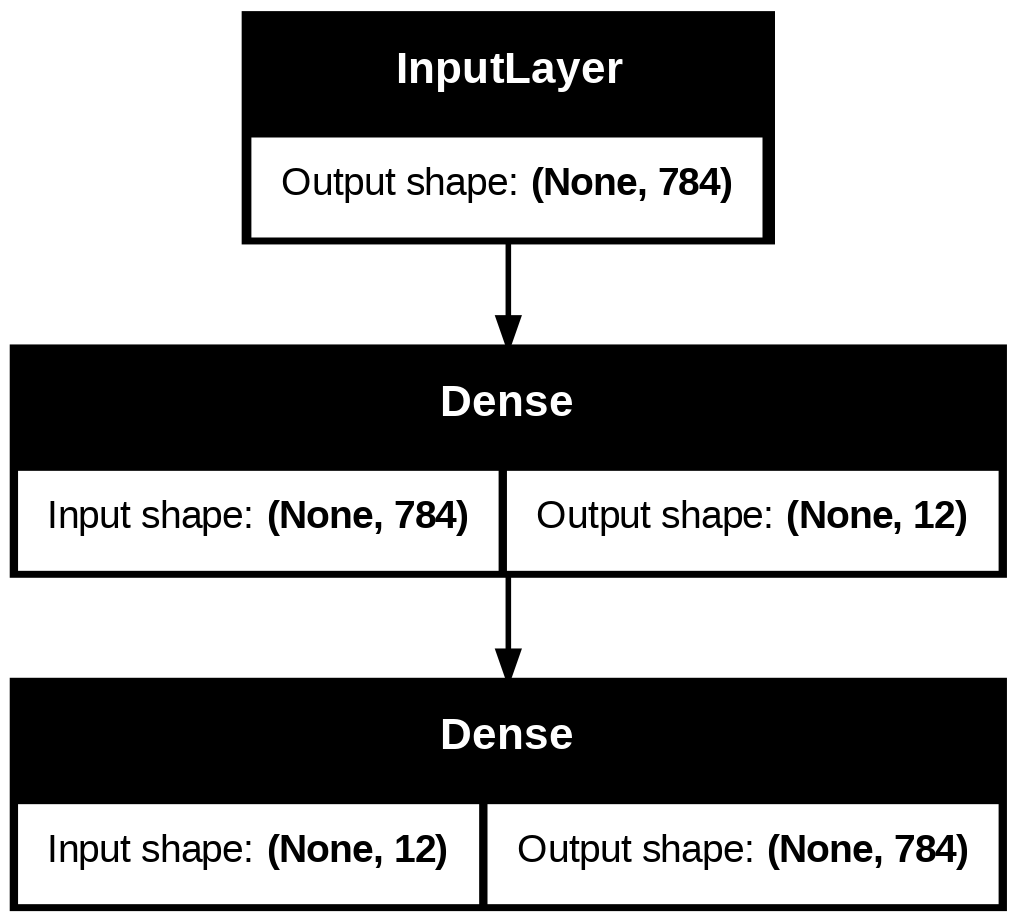

In [8]:
tf.keras.utils.plot_model(autoencoder01, show_shapes=True)

In [9]:
encoder01 = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder01.layers[-1]
decoder01 = keras.Model(encoded_input, decoder_layer(encoded_input))

In [10]:
autoencoder01.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder01.fit(x_train, x_train,
                            epochs=50,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(x_test, x_test),
                            verbose=1) # usar 1 ou 2 para observar a evolucão por época

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.4297 - val_loss: 0.2350
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2216 - val_loss: 0.1917
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1880 - val_loss: 0.1748
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1732 - val_loss: 0.1650
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1647 - val_loss: 0.1600
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1605 - val_loss: 0.1573
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1578 - val_loss: 0.1554
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1558 - val_loss: 0.1538
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1546 - val_loss: 0.1525
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1530 - val_loss: 0.1510
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1517 - val_loss: 0.1499
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

## Avaliação

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


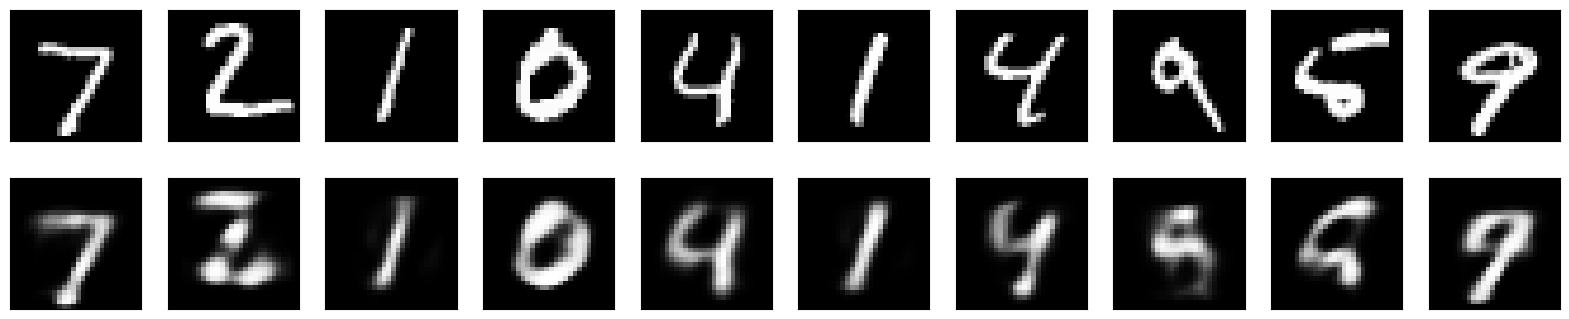

In [11]:
decoded_imgs01 = autoencoder01.predict(x_test)

n = 10  # Imagens visualizadas
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstrução
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs01[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

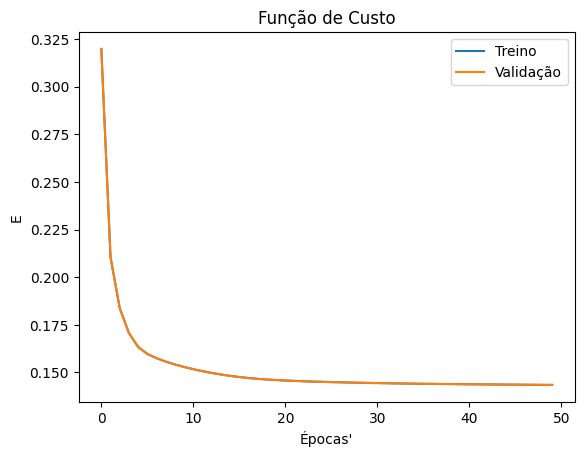

In [12]:
plt.figure()
plt.plot(history.history["loss"], label = "Treino")
plt.plot(history.history["loss"], label = "Validação")
plt.title("Função de Custo")
plt.ylabel("E")
plt.xlabel("Épocas'")
plt.legend()
plt.show()

### Projeção com PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


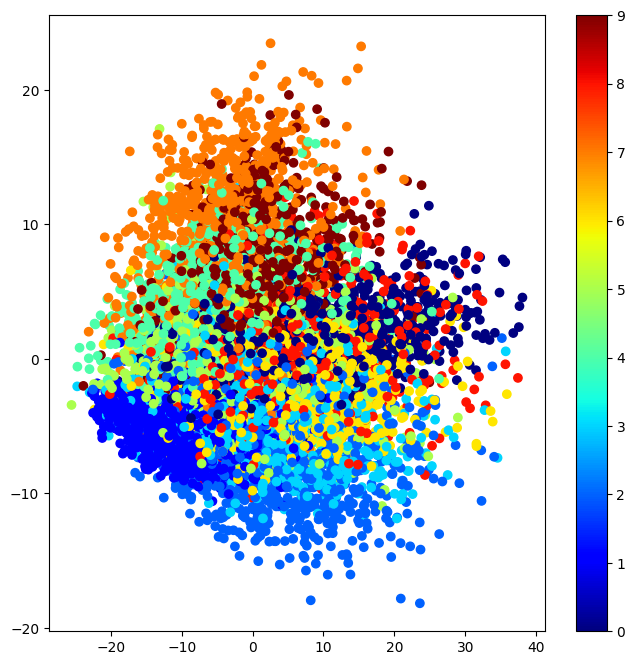

In [13]:
x_test_encoded = encoder01.predict(x_test, batch_size=256)

x_emb = PCA(n_components=2).fit_transform(x_test_encoded)

plt.figure(figsize=(8, 8))
plt.scatter(x_emb[:, 0], x_emb[:, 1], c=y_test, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

### Projeção com t-SNE

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

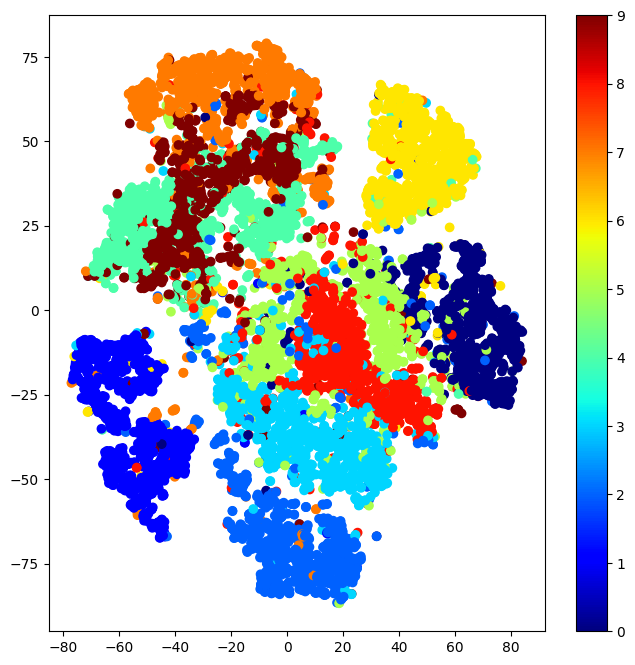

In [14]:
x_emb = TSNE(n_components=2).fit_transform(x_test_encoded)

plt.figure(figsize=(8, 8))
plt.scatter(x_emb[:, 0], x_emb[:, 1], c=y_test, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

# Autoencoder 02: Autoencoder profundo


## Definição do Modelo

In [15]:
encoding_dim = 12

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder02 = keras.Model(input_img, decoded)
autoencoder02.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,804 (858.61 KB)

 Trainable params: 219,804 (858.61 KB)

 Non-trainable params: 0 (0.00 B)

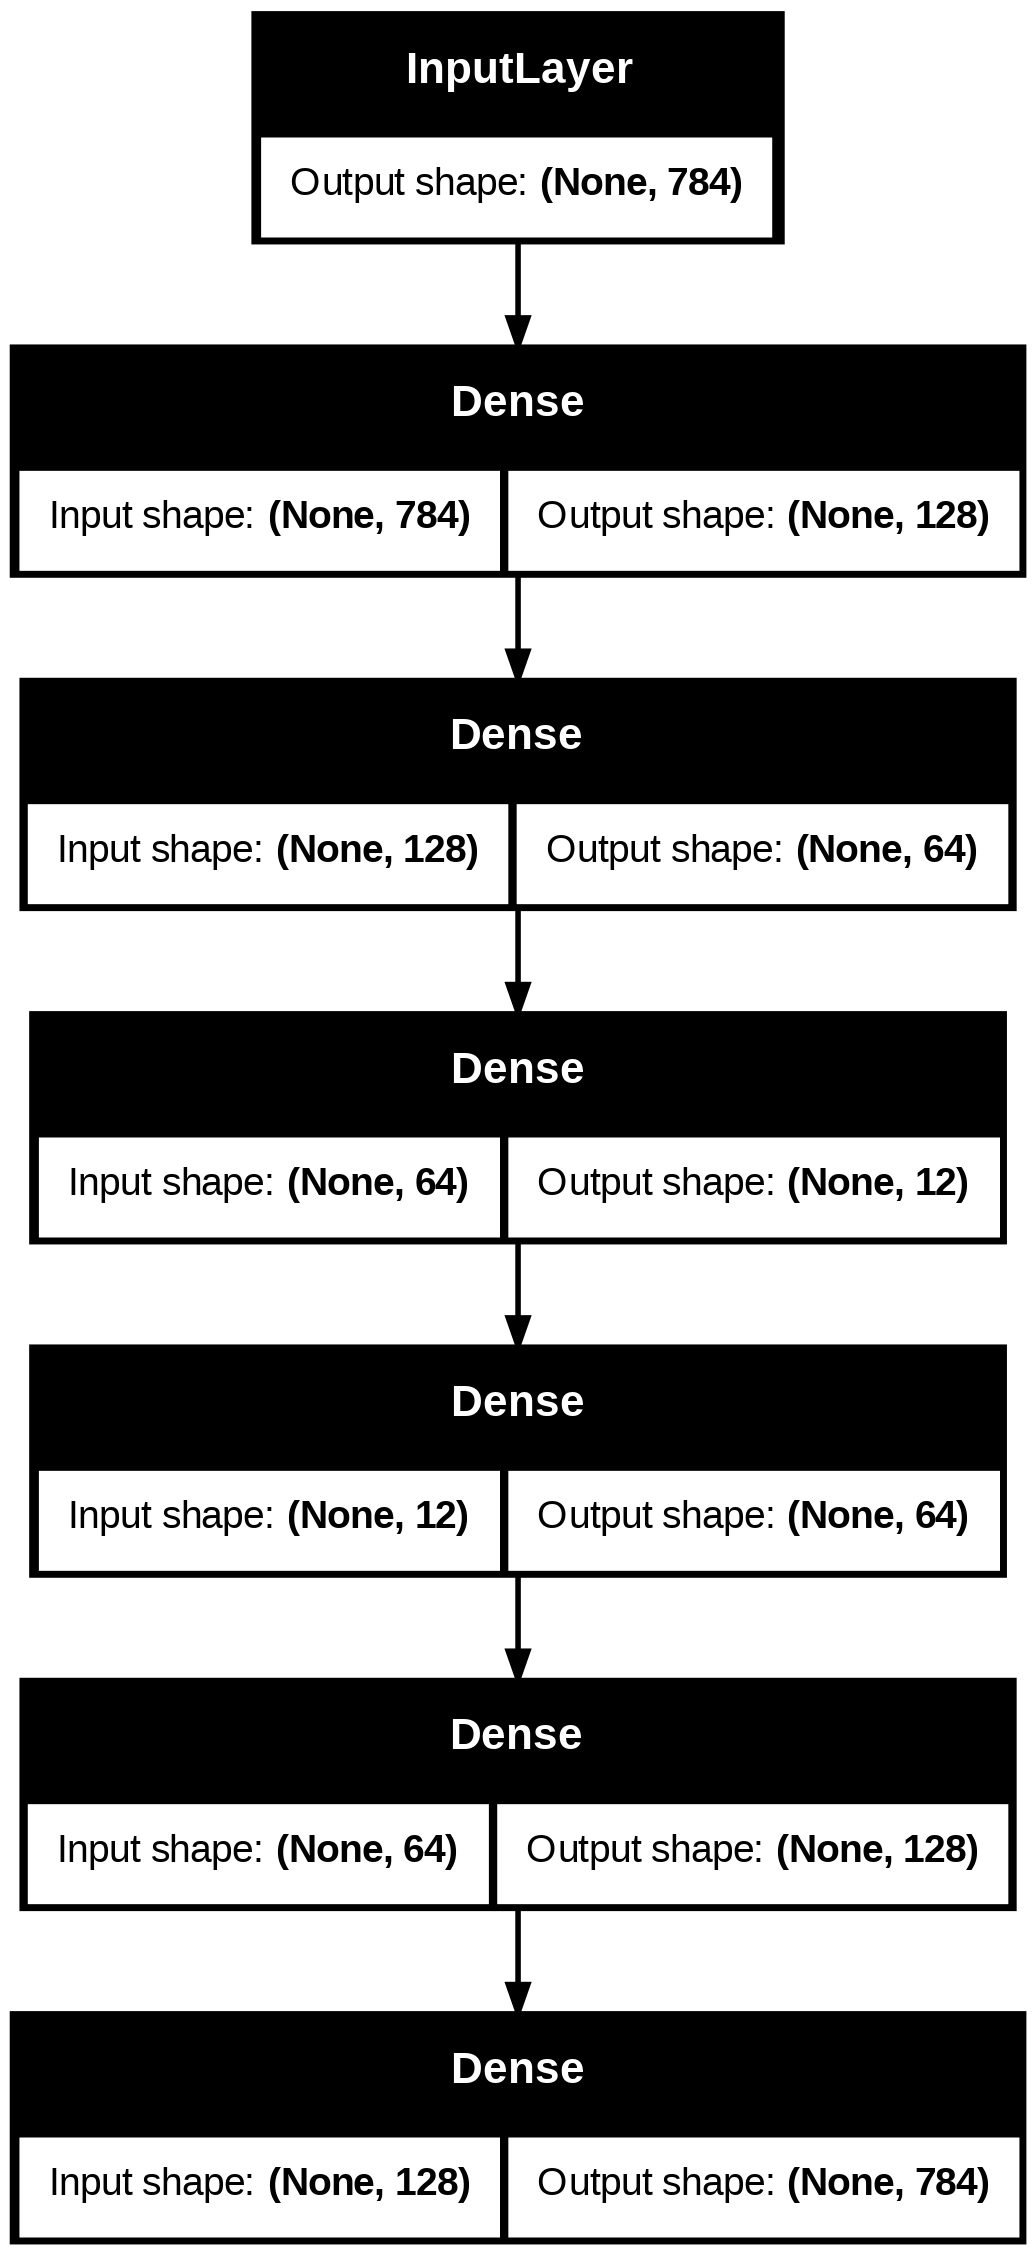

In [16]:
tf.keras.utils.plot_model(autoencoder02, show_shapes=True)

## Criação dos modelos Encoder e Decoder

In [17]:
encoder02 = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder02.layers[-3] # número de camada da saída até a codificação latente
decoder02 = keras.Model(encoded_input, decoder_layer(encoded_input))

## Treinamento do Autoencoder

In [18]:
autoencoder02.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder02.fit(x_train, x_train,
                            epochs=100,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(x_test, x_test),
                            verbose=1) # usar 1 ou 2 para observar a evolucão por época

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.3459 - val_loss: 0.1743
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1680 - val_loss: 0.1513
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1489 - val_loss: 0.1392
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1389 - val_loss: 0.1333
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1337 - val_loss: 0.1284
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1287 - val_loss: 0.1258
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1263 - val_loss: 0.1238
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1248 - val_loss: 0.1225
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1229 - val_loss: 0.1209
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1215 - val_loss: 0.1194
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1202 - val_loss: 0.1187
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━

## Avaliação

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


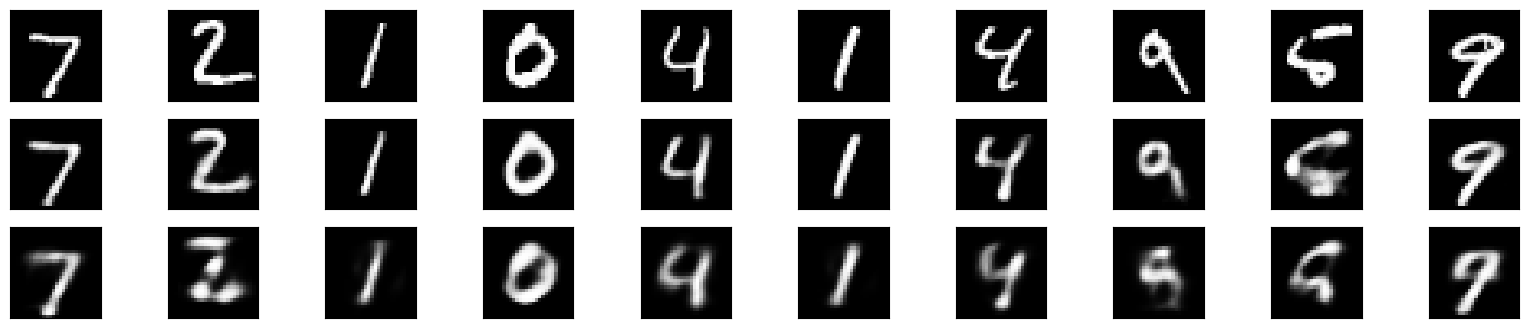

In [19]:
decoded_imgs02 = autoencoder02.predict(x_test)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs02[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction (raso)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs01[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Projeção PCA

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


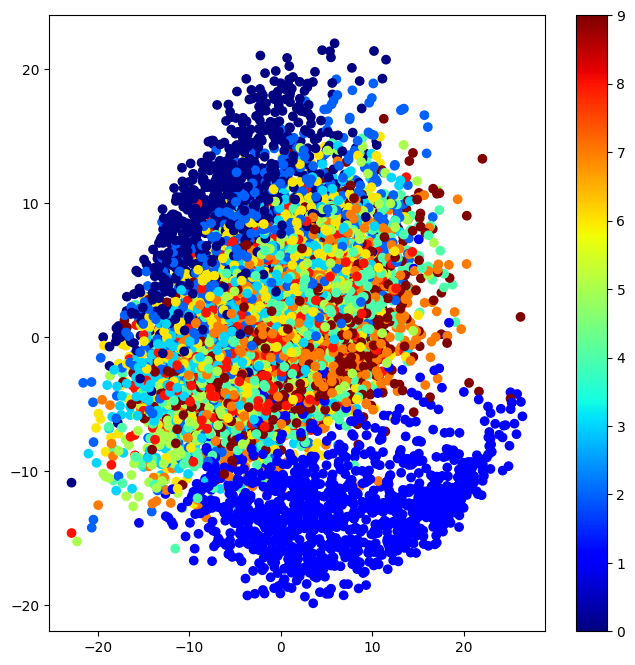

In [20]:
x_test_encoded = encoder02.predict(x_test, batch_size=256)

x_emb = PCA(n_components=2).fit_transform(x_test_encoded)

plt.figure(figsize=(8, 8))
plt.scatter(x_emb[:, 0], x_emb[:, 1], c=y_test, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

### Projeção t-SNE

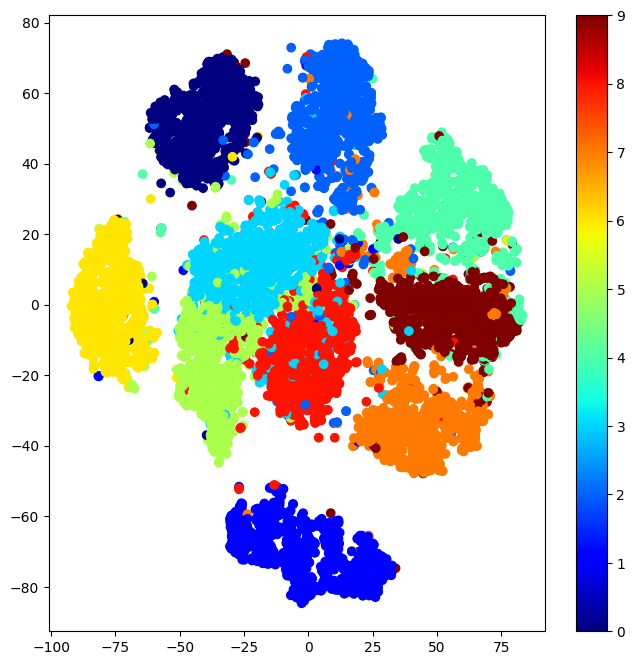

In [21]:
x_emb = TSNE(n_components=2).fit_transform(x_test_encoded)

plt.figure(figsize=(8, 8))
plt.scatter(x_emb[:, 0], x_emb[:, 1], c=y_test, cmap=plt.cm.jet)
plt.colorbar()
plt.show()